## Compare portfolio theories
Here we use shares price history to compare various portfolio allocation theories.
Main idea is to compare different ways to get portfolio:
  * Markovitz optimal portfolio (max Sharpie portfolio)
  * Using Ledoit Wolf caovariance shrinkage
  * Minimal volatility portfolio
  * Market capitalization-weighted portfolio
  * Hierarchical Risk Parity

import necessary libs

In [1]:
import numpy as np
import tqdm
import pandas as pd
import datetime
import importlib

In [2]:
from pypoanal import portfolio_calculators
from pypoanal import dataloader
from pypoanal import backtester

Use plotly backend for drawing charts

In [3]:
%matplotlib widget
pd.options.plotting.backend = "plotly"

## Load the data

Randomly select 50 tickers from ``info/shares_outstanding.csv`` file

In [4]:
tickers_list = np.array(dataloader.load_random_saved_tickers(sample_size=200))
tickers_list

array(['PPIH', 'AXSM', 'NFE', 'PFIN', 'CSTM', 'AHPI', 'APEN', 'IIM',
       'OMEG', 'MFA', 'MCAG', 'HCWB', 'HQH', 'HSIC', 'SQL', 'BIOC', 'YJ',
       'DOYU', 'FORR', 'MYE', 'LNDC', 'BL', 'RIVN', 'HMY', 'CBRL', 'ALLR',
       'SCPL', 'SOLO', 'PPSI', 'NSPR', 'DLB', 'AGEN', 'ZD', 'GGPI',
       'ANTM', 'PEG', 'GBAB', 'BFI', 'KRO', 'BIRD', 'SBGI', 'POWI',
       'GOCO', 'BBGI', 'PBH', 'REGN', 'IQV', 'LBPS', 'CRMD', 'RVSB',
       'DYAI', 'MNR', 'CWT', 'RF', 'FXNC', 'WLFC', 'PKE', 'BIVI', 'DVAX',
       'CRWS', 'GLDD', 'NCLH', 'BPT', 'VRDN', 'SJT', 'CTSH', 'SCYX',
       'CFRX', 'TWCB', 'BRTX', 'APP', 'SNCE', 'EZPW', 'MYJ', 'NIE',
       'ICUI', 'ALACW', 'ASH', 'PLXP', 'KOP', 'ELY', 'GDEV', 'TIOA',
       'STEP', 'NEA', 'BWEN', 'WIA', 'CZNC', 'NVVE', 'KLDO', 'HSC',
       'ITHX', 'BANX', 'HTY', 'TILE', 'GSBC', 'CIDM', 'AGIO', 'XEL',
       'FDMT', 'ACGLO', 'ETX', 'VGM', 'RDFN', 'WOR', 'CRCT', 'ABC',
       'ETON', 'FSV', 'VECO', 'AUR', 'HLMN', 'STAB', 'LUXA', 'K', 'DCI',
       'NATH', 'PHD

Load price and volume history for selected tickers

In [5]:
shares_history = dataloader.load_shares_history(tickers_list)

Loading price and volume: 100%|█████████████████████████████████████████████████████████████████████████| 200/200 [00:12<00:00, 15.52it/s]


## Backtest Performance

Select various ways to create a portfolio from given shares

In [6]:
calculators = {
    # 'max_sharpe': portfolio_calculators.compute_sharpie_weights,
    'HRP': portfolio_calculators.compute_hrp_weights,
    # 'exp_cov': portfolio_calculators.compute_expcov_weights,
    # 'equal': portfolio_calculators.compute_equal_weights,
    'MCAP': portfolio_calculators.compute_mcap_weights,
    'ledoitw_cov': portfolio_calculators.compute_ledoitw_weights
}

We allocate portfolio according to one of the algorithms. Then, portfolio is rebalanced every **rebalance_period** days (e.g. annually).
As a result we get history of allocated portfolios, fees, and portfolio values is USD.
All of that is done in **compare_calculators_for_periodic_rebalance** method.
Here *backtesting* means testing the trategy back in time (using hitorical data). 

In [7]:
backtest_start_date = datetime.date(2006, 8, 8)
backtest_end_date = datetime.date(2021, 12, 12)
rebalance_period = datetime.timedelta(days=360)
rebalance_dates = backtester.compute_rebalance_dates(backtest_start_date,backtest_end_date,rebalance_period)
importlib.reload(backtester)

values_history_per_calc, fees_history_per_calc, portfolio_history_per_calc = backtester.compare_calculators_for_periodic_rebalance(calculators,
                                                                                                                  tickers_list,
                                                                                                                  10**4,
                                                                                                                  rebalance_dates,
                                                                                                                  shares_history=shares_history)

HRP


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.28it/s]


MCAP


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 15.54it/s]


ledoitw_cov


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  7.59it/s]


How did the value of the annually rebalanced market-cap weighted portfolio value changed over time:

In [8]:
values_history_per_calc['MCAP'].head()

2006-08-08    10000.000000
2007-08-03     9996.002078
2008-07-28     8737.850770
2009-07-23     6755.129334
2010-07-18     7650.662769
Name: MCAP, dtype: float64

How did the rebalance fees of the annually rebalanced market-cap weighted portfolio value changed over time:

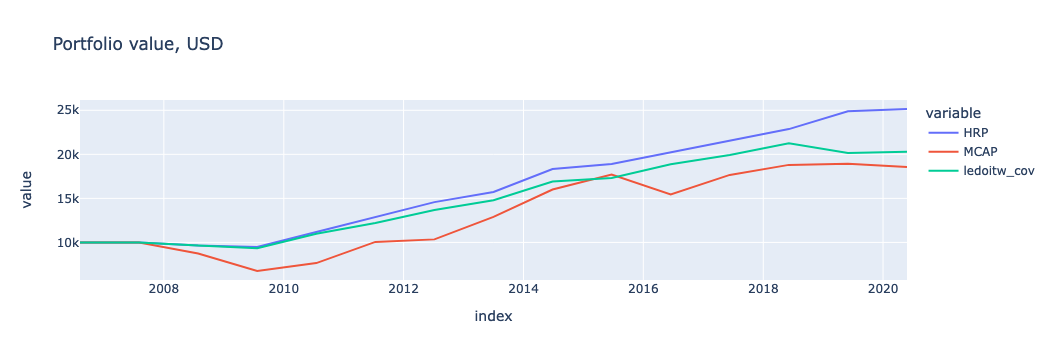

In [9]:
values_history_per_calc.plot(title=f'Portfolio value, USD')

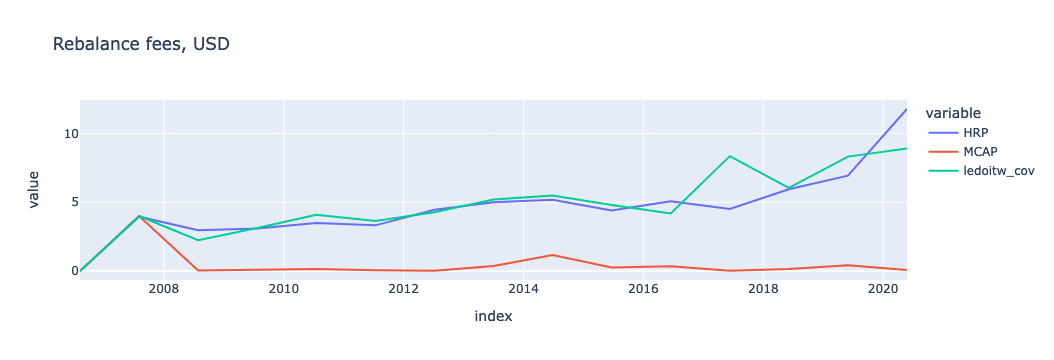

In [10]:
fees_history_per_calc.plot(title=f'Rebalance fees, USD')

##  Backtests varying start date
Now we can test how the date we start the backtest from affects the results

In [11]:
calculators = {
    # 'max_sharpe': portfolio_calculators.compute_sharpie_weights,
    'HRP': portfolio_calculators.compute_hrp_weights,
    # 'exp_cov': portfolio_calculators.compute_expcov_weights,
    # 'equal': portfolio_calculators.compute_equal_weights,
    'MCAP': portfolio_calculators.compute_mcap_weights,
    'ledoitw_cov': portfolio_calculators.compute_ledoitw_weights
}

In [12]:
from random import randint
importlib.reload(backtester)
backtest_start_date = datetime.date(2010, 8, 8)
backtest_end_date = datetime.date(2022, 1, 15)
rebalance_period = datetime.timedelta(days=360)
num_starting_dates = 40
initial_cash = 10 ** 6
start_days_delta = list(sorted(set(randint(-4*365, 4*365) for k in range(num_starting_dates))))
start_dates = [backtest_start_date+datetime.timedelta(days=days) for days in start_days_delta]
# start_dates = [datetime.date(2009,5,10)]
stats: dict[pd.DataFrame] = dict()
for calc_name, calculate_weights in calculators.items():
    start_to_end_values_df = pd.DataFrame()
    for start_date in tqdm.tqdm(start_dates,desc=calc_name,disable=False):
        rebalance_dates = backtester.compute_rebalance_dates(start_date,backtest_end_date,rebalance_period)
        portfolio_history, _ = backtester.reallocate_portfolio_periodically(calculate_weights,
                                                                            rebalance_dates,
                                                                            initial_cash,
                                                                            fees_percent=0.04,
                                                                            shares_history=shares_history,
                                                                            progress_bar=False)
        values_history: list[np.float64] = backtester.portfolios_values_history(list(zip(rebalance_dates,portfolio_history)),
                                                                                shares_history.price_history)
        values_history_dataframe = pd.DataFrame({str(start_date):values_history},index=rebalance_dates)
        start_to_end_values_df = start_to_end_values_df.join(values_history_dataframe,how='outer')
    stats[calc_name] = start_to_end_values_df

ledoitw_cov: 100%|████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:41<00:00,  1.03s/it]


In [13]:
stats.keys()

dict_keys(['HRP', 'MCAP', 'ledoitw_cov'])

stats is a dict of dataframes. Column of each dataframe correspond to start date, rows correspond to next reallocation date.

In [14]:
stats['ledoitw_cov'].head()

2006-08-21      2006-10-13  2007-04-24  2008-05-11  \
2006-08-21  1000000.000000             NaN         NaN         NaN   
2006-10-13             NaN  1000000.000000         NaN         NaN   
2007-04-24             NaN             NaN   1000000.0         NaN   
2007-08-16   999600.160408             NaN         NaN         NaN   
2007-10-08             NaN   999600.160508         NaN         NaN   

            2008-06-22  2008-08-03  2008-08-09  2009-04-19  2009-08-15  \
2006-08-21         NaN         NaN         NaN         NaN         NaN   
2006-10-13         NaN         NaN         NaN         NaN         NaN   
2007-04-24         NaN         NaN         NaN         NaN         NaN   
2007-08-16         NaN         NaN         NaN         NaN         NaN   
2007-10-08         NaN         NaN         NaN         NaN         NaN   

            2009-08-20  ...  2012-10-16  2012-11-13  2013-03-26  2013-06-15  \
2006-08-21         NaN  ...         NaN         NaN         NaN         NaN   
2006-10-13         NaN  ...         NaN         NaN         NaN         NaN   
2007-04-24         NaN  ...         NaN         NaN         NaN         NaN   
2007-08-16         NaN  ...         NaN         NaN         NaN         NaN   
2007-10-08         NaN  ...         NaN         NaN         NaN         NaN   

            2013-08-31  2013-12-04  2013-12-13  2014-01-07  2014-03-15  \
2006-08-21         NaN         NaN         NaN         NaN         NaN   
2006-10-13         NaN         NaN         NaN         NaN         NaN   
2007-04-24         NaN         NaN         NaN         NaN         NaN   
2007-08-16         NaN         NaN         NaN         NaN         NaN   
2007-10-08         NaN         NaN         NaN         NaN         NaN   

            2014-05-10  
2006-08-21         NaN  
2006-10-13         NaN  
2007-04-24         NaN  
2007-08-16         NaN  
2007-10-08         NaN  

[5 rows x 40 columns]

A-ha! Not trivial...

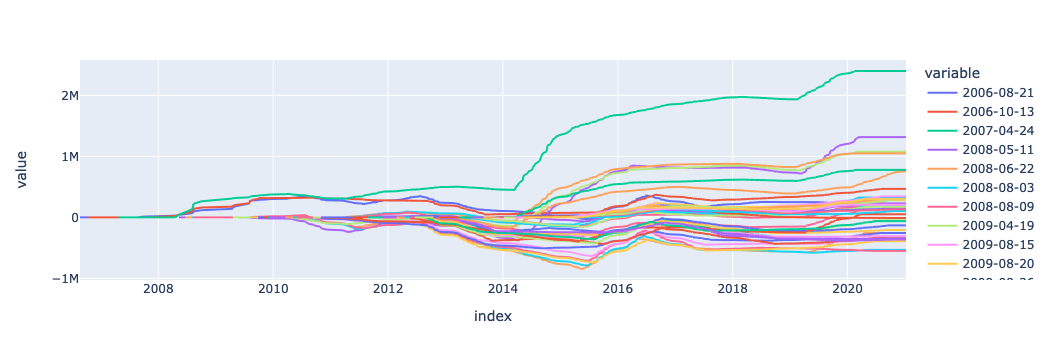

In [15]:
(stats['ledoitw_cov']-stats['MCAP']).interpolate().plot()

Comparing HRP results to marcet-cap weighted portfolios

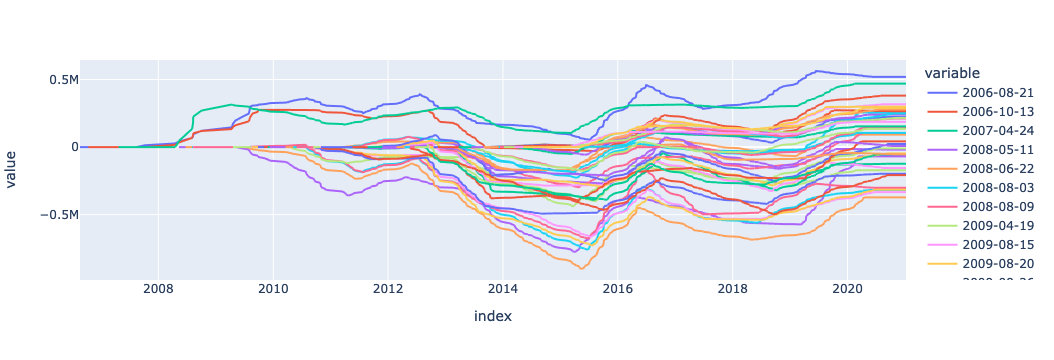

In [16]:
(stats['HRP']-stats['MCAP']).interpolate().plot()

Note, that portolios bought before the 2008 financial crysis performed much better, yielding significantly higher returns.

Consider distribution of portfolio values compared to MCAP. Start date is randomized.

In [17]:
import plotly.express as px
mcap_diff = pd.DataFrame()
mcap_diff['ledoitw_cov'] = (stats['ledoitw_cov']-stats['MCAP']).interpolate().iloc[-1]
mcap_diff['HRP'] = (stats['ledoitw_cov']-stats['HRP']).interpolate().iloc[-1]

In [18]:
mcap_diff.describe()

ledoitw_cov           HRP
count  4.000000e+01  4.000000e+01
mean   1.749889e+05  1.132213e+05
std    5.646100e+05  4.908976e+05
min   -5.485741e+05 -3.534287e+05
25%   -2.559718e+05 -1.460652e+05
50%    1.369339e+05 -8.586291e+03
75%    2.986715e+05  7.156976e+04
max    2.400082e+06  1.930100e+06

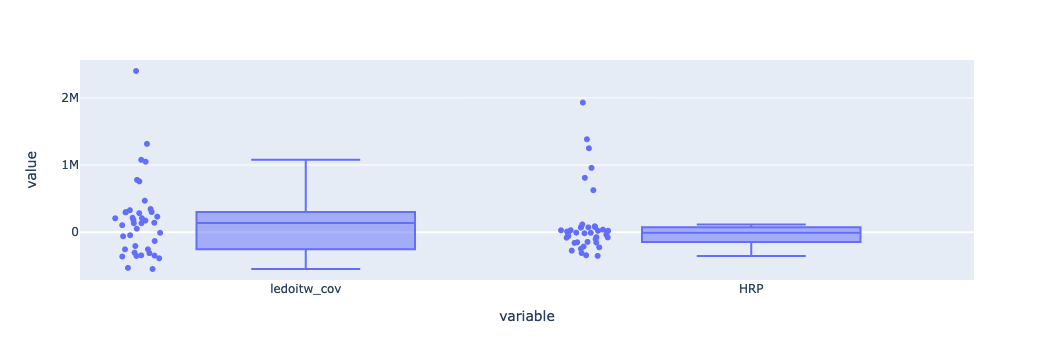

In [19]:
px.box(mcap_diff, y=['ledoitw_cov','HRP'], points='all')

Remove outliers

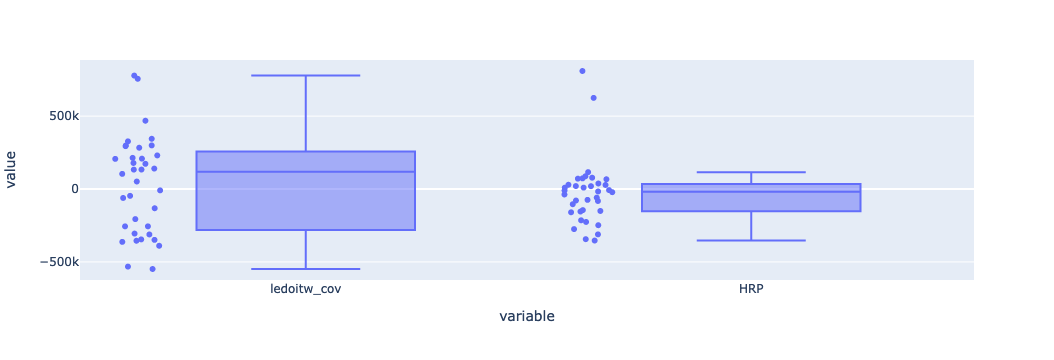

In [20]:
mcap_diff=mcap_diff[(mcap_diff>-1000_000) & (mcap_diff<1000_000)].dropna()
px.box(mcap_diff, y=['ledoitw_cov','HRP'], points='all')

Are they normally distributed? Let's apply Shapiro-Wilk test

In [21]:
import scipy.stats as st
st.shapiro(mcap_diff['ledoitw_cov']).pvalue, st.shapiro(mcap_diff['HRP']).pvalue

(0.1459333747625351, 1.7132209904957563e-05)

95% Confidence interval for means

In [22]:
# returns confidence interval of mean
def conf_int_mean(a, conf=0.95):
    mu, sem, m = np.mean(a), st.sem(a), st.t.ppf((1+conf)/2., len(a)-1)
    return mu - m*sem, mu + m*sem

In [23]:
conf_int_mean(mcap_diff['ledoitw_cov']), conf_int_mean(mcap_diff['HRP'])

((-80330.42727116794, 144629.88258957508),
 (-103565.04248417198, 48496.16739371008))